In [289]:
import numpy as np 
import pandas as pd 
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [290]:
a = pd.read_excel('Inputs/FuelEconomyDatabase1975_2018.xlsx', sheet_name = 'ALL')

# create columns with year on year change in mpg 
a['2-Cycle MPG Change'] = float(0)
a['Real-World MPG Change'] = float(0)
a['Real-World MPG_City Change'] = float(0)
a['Real-World MPG_Hwy Change'] = float(0)
a['RegulationDummy'] = 0
a['RegulationExpected'] = 0

# regulations passes: 1975, 1996 (LT), 2003 (LT), 2007 (EISA), 2012
# regulation years: 1978, 1979 (trucks) - 1985, 1998-2003(LT), 2005-2007 2011-2016, 2017-2025

#regYears = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
regYears = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
regYearsAnnounced = [1975, 1976, 1977, 2007, 2008, 2009, 2010]
regYearsAnnounced = regYearsAnnounced + regYears


for n in range(a.shape[0]-1):
    a['2-Cycle MPG Change'][n+1] = a['2-Cycle MPG'][n+1] - a['2-Cycle MPG'][n]
    a['Real-World MPG Change'][n+1] = a['Real-World MPG'][n+1] - a['Real-World MPG'][n]
    a['Real-World MPG_City Change'][n+1] = a['Real-World MPG_City'][n+1] - a['Real-World MPG_City'][n]
    a['Real-World MPG_Hwy Change'][n+1] = a['Real-World MPG_Hwy'][n+1] - a['Real-World MPG_Hwy'][n]
    if (a['Model Year'][n+1]) in regYears:
        a['RegulationDummy'][n+1] = 1
    if a['Model Year'][n+1] in regYearsAnnounced:
        a['RegulationExpected'][n+1] = 1
a['RegulationExpected'][0] = 1

/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.

In [254]:
d = pd.read_excel('Inputs/FuelEconomyDatabase1975_2018.xlsx', sheet_name = 'CAR')

# create columns with year on year change in mpg 
d['2-Cycle MPG Change'] = float(0)
d['Real-World MPG Change'] = float(0)
d['Real-World MPG_City Change'] = float(0)
d['Real-World MPG_Hwy Change'] = float(0)
d['RegulationDummy'] = 0
d['RegulationExpected'] = 0

# regulations passes: 1975, 1996 (LT), 2003 (LT), 2007 (EISA), 2012
# regulation years: 1978, 1979 (trucks) - 1985, 1998-2003(LT), 2005-2007 2011-2016, 2017-2025

#regYears = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
regYears = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
regYearsAnnounced = [1975, 1976, 1977, 2007, 2008, 2009, 2010]
regYearsAnnounced = regYearsAnnounced + regYears


for n in range(d.shape[0]-1):
    d['2-Cycle MPG Change'][n+1] = d['2-Cycle MPG'][n+1] - d['2-Cycle MPG'][n]
    d['Real-World MPG Change'][n+1] = d['Real-World MPG'][n+1] - d['Real-World MPG'][n]
    d['Real-World MPG_City Change'][n+1] = d['Real-World MPG_City'][n+1] - d['Real-World MPG_City'][n]
    d['Real-World MPG_Hwy Change'][n+1] = d['Real-World MPG_Hwy'][n+1] - d['Real-World MPG_Hwy'][n]
    if (d['Model Year'][n+1]) in regYears:
        d['RegulationDummy'][n+1] = 1
    if d['Model Year'][n+1] in regYearsAnnounced:
        d['RegulationExpected'][n+1] = 1
d['RegulationExpected'][0] = 1

/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rebeccaciez1/opt/anaconda3/lib/python3.

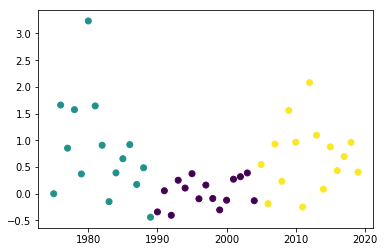

In [255]:
X = d[["Model Year", "2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)

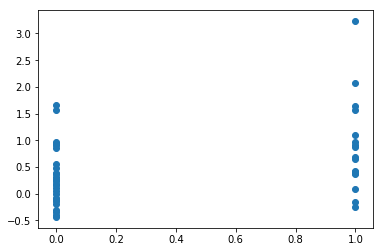

In [256]:
plt.scatter(d['RegulationDummy'].to_numpy(), d['2-Cycle MPG Change'].to_numpy())

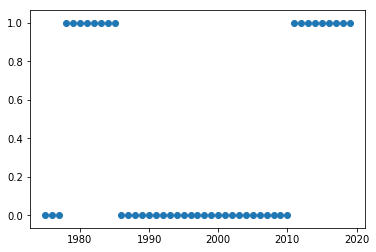

In [257]:
plt.scatter(d['Model Year'].to_numpy(), d['RegulationDummy'].to_numpy())

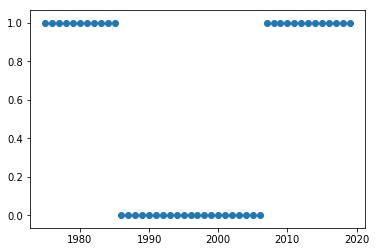

In [258]:
plt.scatter(d['Model Year'].to_numpy(), d['RegulationExpected'].to_numpy())

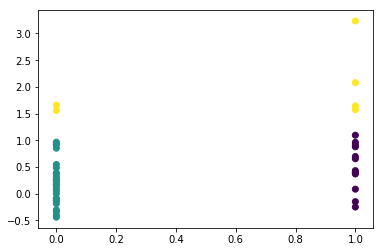

In [259]:
X = d[["RegulationDummy", "2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)

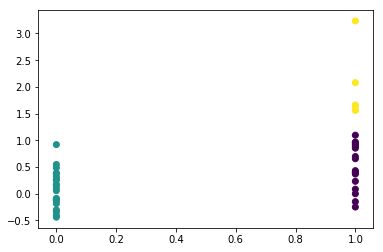

In [260]:
X = d[["RegulationExpected", "2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)

Text(0, 0.5, '2-cycle mpg change (yellow/purple)\n and binary standard/no standard (blue)')

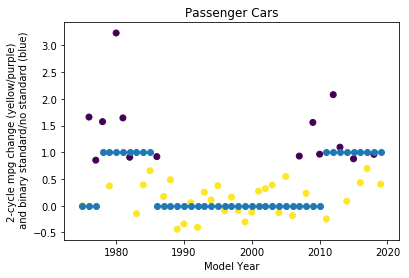

In [261]:
X = d[["2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(d["Model Year"].to_numpy(), X[:,0], c=kmeans)
plt.scatter(d["Model Year"].to_numpy(), d["RegulationDummy"].to_numpy())
plt.title('Passenger Cars')
plt.xlabel('Model Year')
plt.ylabel('2-cycle mpg change (yellow/purple)\n and binary standard/no standard (blue)')

In [262]:
# agreement between kmeans and regulation dummies:
sum(abs(kmeans - d['RegulationDummy'].to_numpy()))/len(kmeans)

0.6666666666666666

Text(0, 0.5, '2-cycle mpg change (yellow/purple)\n and binary standard/no standard (blue)')

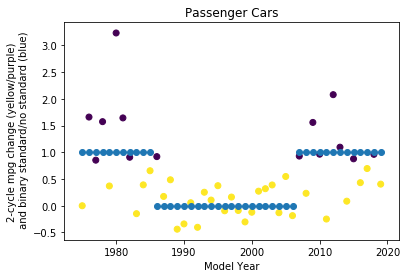

In [263]:
X = d[["2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(d["Model Year"].to_numpy(), X[:,0], c=kmeans)
plt.scatter(d["Model Year"].to_numpy(), d["RegulationExpected"].to_numpy())
plt.title('Passenger Cars')
plt.xlabel('Model Year')
plt.ylabel('2-cycle mpg change (yellow/purple)\n and binary standard/no standard (blue)')

In [264]:
# agreement between kmeans and regulation dummies:
sum(abs(kmeans - d['RegulationExpected'].to_numpy()))/len(kmeans)

0.7333333333333333

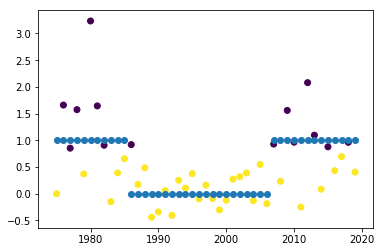

In [265]:
# cluster just on 2-cycle mpg change
X = d[["2-Cycle MPG Change"]].to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(d["Model Year"].to_numpy(), X[:,0], c=kmeans)
plt.scatter(d["Model Year"].to_numpy(), d['RegulationExpected'].to_numpy())

In [266]:
np.mean(d['2-Cycle MPG Change'].to_numpy())

0.5149288888888889

In [267]:
np.median(d['2-Cycle MPG Change'].to_numpy())

0.3755199999999981

In [268]:
np.std(d['2-Cycle MPG Change'].to_numpy())

0.7273115993215383

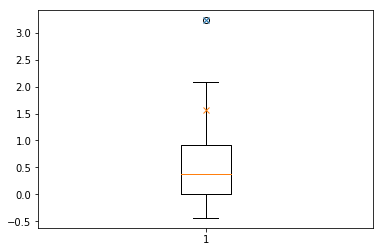

In [269]:
X = d[["2-Cycle MPG Change"]].to_numpy()
plt.boxplot(X)
plt.plot(1, d["2-Cycle MPG Change"][5], 'x')
plt.plot(1, d["2-Cycle MPG Change"][34], 'x')

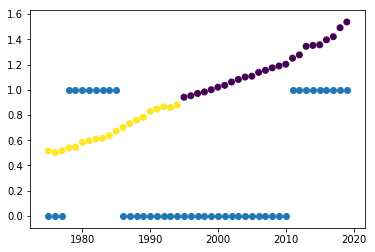

In [270]:
X = d[["HP/Engine Displacement"]].to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(d["Model Year"].to_numpy(), X[:,0], c=kmeans)
plt.scatter(d["Model Year"].to_numpy(), d["RegulationDummy"].to_numpy())

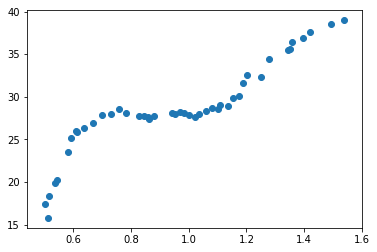

In [271]:
plt.scatter(d["HP/Engine Displacement"].to_numpy(), d["2-Cycle MPG"].to_numpy())

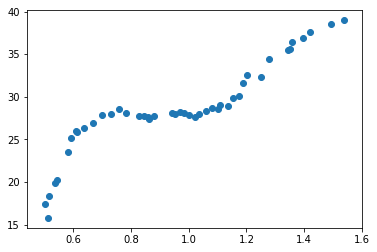

In [303]:
# Create linear regression object
X = [d["HP/Engine Displacement"].to_numpy()]
y = [d["2-Cycle MPG"].to_numpy()]
reg = linear_model.LinearRegression().fit(X, y)
plt.scatter(X,y)

In [302]:
reg.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [295]:
reg.intercept_

array([15.79036, 17.4507 , 18.304  , 19.87823, 20.24839, 23.48268,
       25.12687, 26.03471, 25.8864 , 26.27705, 26.93247, 27.85232,
       28.02662, 28.51236, 28.07352, 27.73321, 27.78926, 27.38565,
       27.63839, 27.74464, 28.12016, 28.0259 , 28.18836, 28.09964,
       27.79663, 27.67536, 27.94795, 28.26706, 28.65618, 28.52576,
       29.07341, 28.88812, 29.81796, 30.05097, 31.61066, 32.57574,
       32.32677, 34.40638, 35.50253, 35.58797, 36.46639, 36.89866,
       37.59529, 38.55766, 38.96216])